In [1]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

In [2]:
df = pd.read_csv('alldata.csv')

In [3]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
# Code to check if there are NaNs in the dataset
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [5]:
# The column review will be removed from the dataset since it will not be used
df.drop(columns = 'reviews', inplace = True)

In [6]:
# code to remove remaining rows from dataset containing NaNs
df.drop(index = df[df['position'].isnull()].index, inplace = True)
df.isnull().any()

position       False
company        False
description    False
location       False
dtype: bool

In [7]:
# To organize the data, I created separate columns for city and state based on the location information in the original dataset.

df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip())
df['location'] = df['city']+ ', ' + df['state']
df.head()






,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


Exploratory Data Analysis:

In this section Matplotlib will be used to answer the following questions.
1.What iss the most common job to appear when searching for a Data Science job.
2.Which company employs the most Data Scientists.
3.Which citys and states hire the most workers.


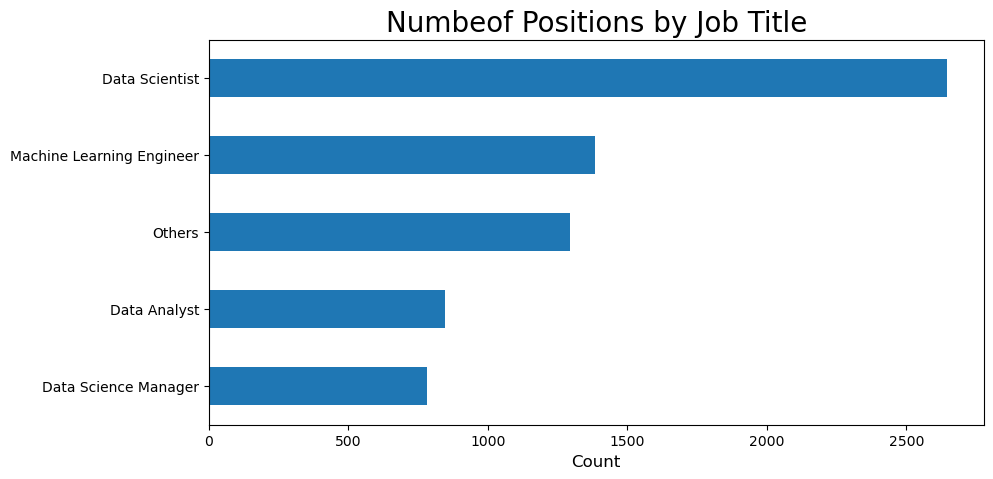

In [8]:
# Group position name into 5 types
data = df.copy()

# Convert all position titles to uppercase

data['position'] = data['position'].str.upper()

# Reassign positions to specific categories
data.loc[data['position'].str.contains("SCIENTIST"), 'position'] = 'Data Scientist'
data.loc[data['position'].str.contains('ENGINEER|PRINCIPAL STATISTICAL PROGRAMMER|PROGRAMMER|DEVELOPER'), 'position'] = 'Machine Learning Engineer'
data.loc[data['position'].str.contains('ANALYST|STATISTICIAN'), 'position'] = 'Data Analyst'
data.loc[data['position'].str.contains('MANAGER|CONSULTANT|DATA SCIENCE|DIRECTOR'), 'position'] = 'Data Science Manager'

# Assign 'Others' to any positions that don't match the above
data['position'] = data['position'].apply(lambda x: x if x in ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Science Manager'] else 'Others')

# Group by position and count occurrences
title = data.groupby('position').count().sort_values('company')

# Plot the result
title['company'].plot(kind='barh', figsize=(10, 5))
plt.xlabel('Count', size=12)
plt.ylabel('')
plt.yticks(size=10)
plt.xticks(size=10)
plt.title('Numbeof Positions by Job Title', size=20)
plt.show()


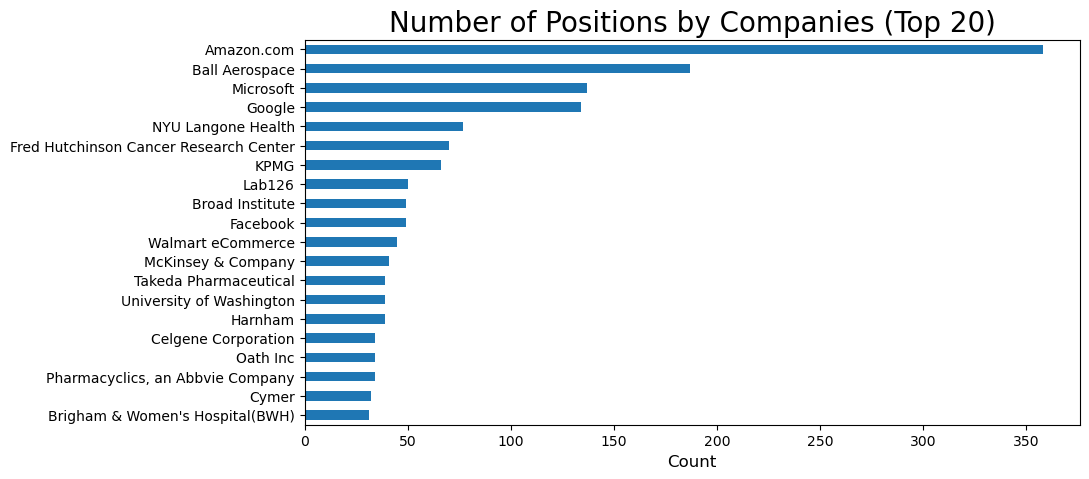

In [9]:
# The top five cities that hire the most Data science related jobs are New York, Seatle, Cambridge, Boston, and San Francisco.


company = df.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

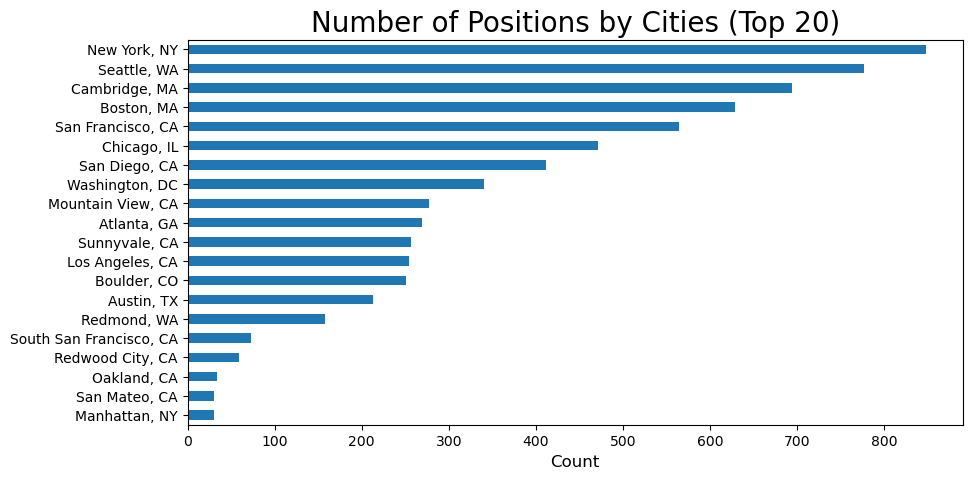

In [10]:
# Positions by Cities, top 20

city = df.groupby(['location']).count().sort_values('position').tail(20)

city['position'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

The top Cities that employ the most data science related jobs are New York, Seatle, Cambridge, Boston, and
San Francisco 

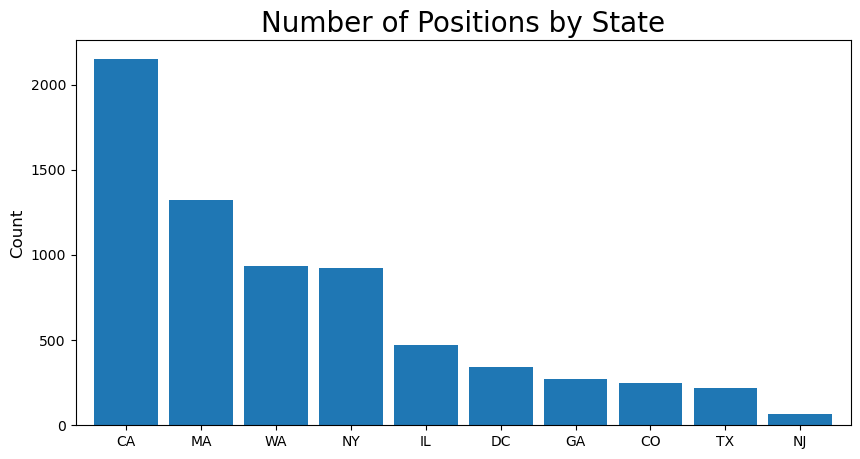

In [15]:
# job positions by State

state = df.groupby('state').count().sort_values('position',ascending = False)

state['position'].plot(kind = 'bar',figsize = (10,5) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()

Even though the data shows that the city with the highest number of jobs is New York, the highest number of jobs by state is California.

# Positions by State and Job Title


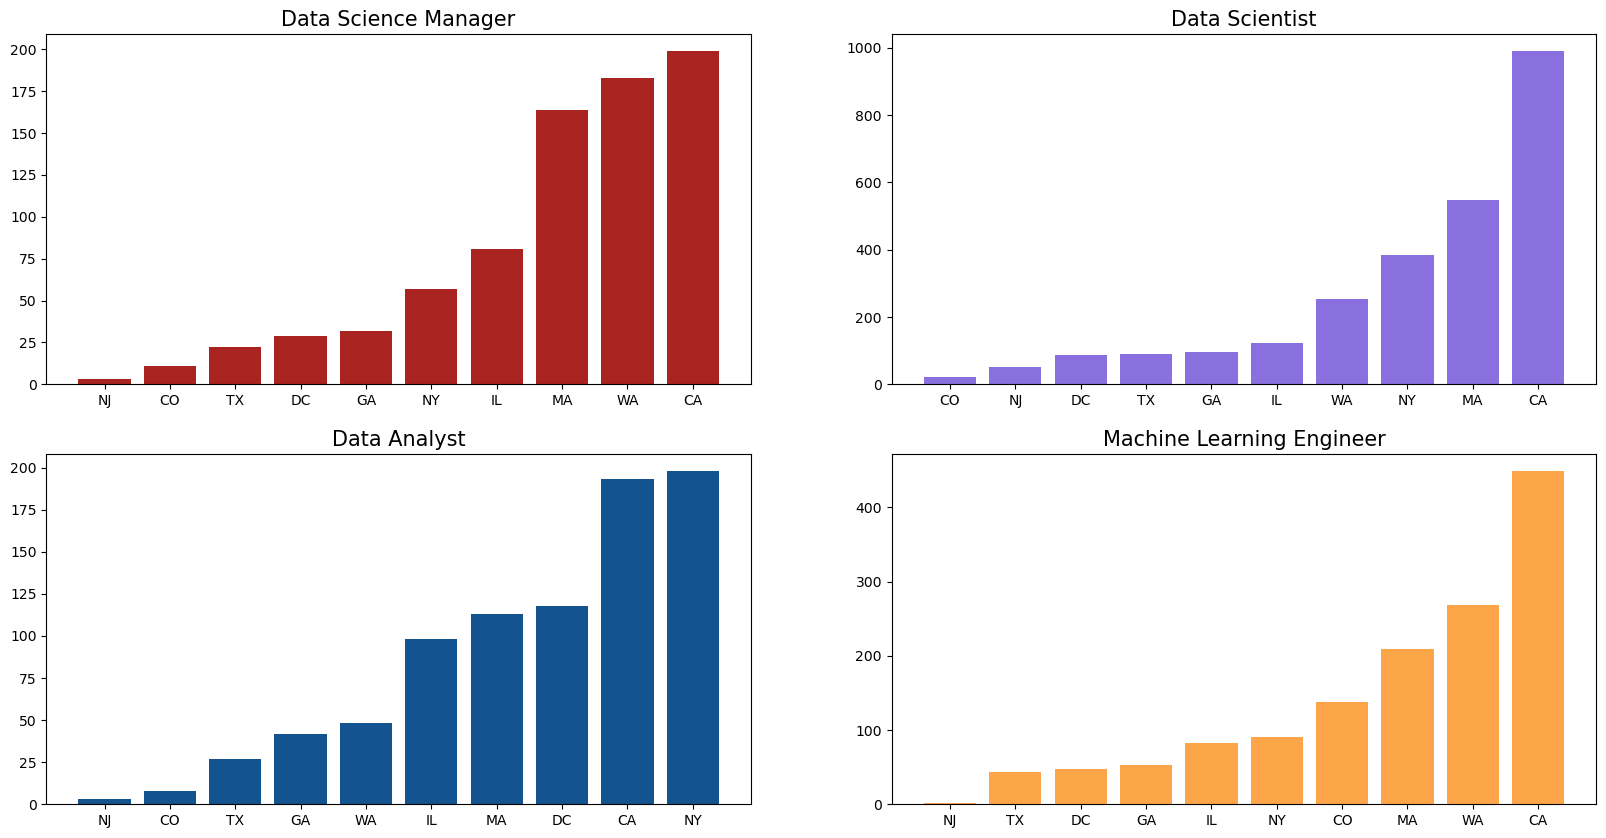

In [16]:
data = data[data['position'] != 'Others']
i = 1
color = ['#A92420','#8A6FDF','#135390','#FDA649']
fig = plt.figure(figsize=(20,10))
for position in data.position.unique():
    x = data[data['position']== str(position)].groupby(['state']).count().sort_values('company')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(position), size = 15)
plt.show()

The positions for Data Science Manager, Data Science and Machine learning Engineer, California is the state that hires the most. For Data Analyst, New York hires the most, followed by california.